<a href="https://colab.research.google.com/github/astrasourav/Deep-Learning-/blob/master/Cats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing kaggle datasets in colab

In [1]:
# Code for using kaggle datsets in colab

# !pip install kaggle

from google.colab import files
files.upload()

!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Changing permission
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
# Importing the KAggle dataset

!kaggle datasets download -d chetankv/dogs-cats-images

 97% 423M/435M [00:07<00:00, 31.9MB/s]
100% 435M/435M [00:07<00:00, 59.1MB/s]


In [0]:
import os 
import zipfile

data_zip = '/content/dogs-cats-images.zip'
data_file = zipfile.ZipFile(data_zip, 'r')
data_file.extractall('/content/')
data_file.close()

Using tensorflow and keras

In [0]:
# Importing Libraries

import tensorflow as tf
from tensorflow import keras

In [5]:
# Preprocessing the data 

from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

train_dir = '/content/dog vs cat/dataset/training_set'
train_datagen = ImageDataGenerator(
      rescale=1./255,
      horizontal_flip=True,
      shear_range=0.2,
      zoom_range=0.2,
)

test_dir = '/content/dog vs cat/dataset/test_set' 
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(64, 64),
      class_mode='binary',
      batch_size=batch_size
)

test_generator = test_datagen.flow_from_directory(
      test_dir,
      target_size=(64, 64),
      class_mode='binary',
      batch_size=batch_size
)

Using TensorFlow backend.


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Creating CNN Model

In [6]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=2),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=2),
                                    tf.keras.layers.Dropout(0.15),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dropout(0.15),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [7]:
# Compiling and training thee model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(train_generator, epochs=25, steps_per_epoch=8000/batch_size, validation_data=test_generator, validation_steps=2000/batch_size)

Epoch 1/25
250/250 [==============================] - 34s 136ms/step - loss: 0.6940 - accuracy: 0.5095 - val_loss: 0.6935 - val_accuracy: 0.4995
Epoch 2/25
250/250 [==============================] - 33s 134ms/step - loss: 0.6745 - accuracy: 0.5699 - val_loss: 0.6385 - val_accuracy: 0.6350
Epoch 3/25
250/250 [==============================] - 34s 135ms/step - loss: 0.6317 - accuracy: 0.6401 - val_loss: 0.6381 - val_accuracy: 0.6305
Epoch 4/25
250/250 [==============================] - 33s 134ms/step - loss: 0.5964 - accuracy: 0.6785 - val_loss: 0.5535 - val_accuracy: 0.7295
Epoch 5/25
250/250 [==============================] - 33s 133ms/step - loss: 0.5798 - accuracy: 0.6992 - val_loss: 0.5621 - val_accuracy: 0.7030
Epoch 6/25
250/250 [==============================] - 34s 134ms/step - loss: 0.5509 - accuracy: 0.7165 - val_loss: 0.5210 - val_accuracy: 0.7480
Epoch 7/25
250/250 [==============================] - 33s 133ms/step - loss: 0.5271 - accuracy: 0.7412 - val_loss: 0.5037 - val_ac

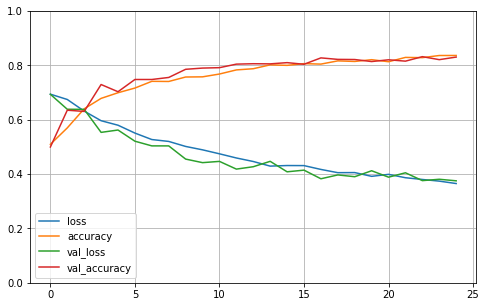

In [8]:
# Plotting the model curve 

import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
# # Predicting image

# # Preprocessing the image data before testing it with our model
import numpy as np
from keras.preprocessing import image

path = '/content/cat-pet-animal-domestic-104827.jpeg'
new = image.load_img(path, target_size=(64,64))
new = image.img_to_array(new)
new = np.expand_dims(new, axis=0)

asset = model.predict(new)
print(asset)

[[0.]]


In [11]:
# Checking class indices to check which indices belongs to which class

test_generator.class_indices

{'cats': 0, 'dogs': 1}